In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

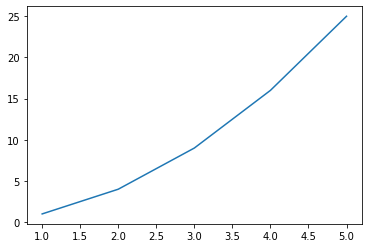

In [2]:
x = [1, 2, 3, 4, 5]
# y = [1, 4, 9, 16, 25]
y = np.array(x) ** 2
plt.plot(x, y)

In [3]:
y

array([ 1,  4,  9, 16, 25])

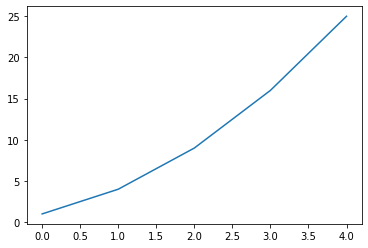

In [4]:
plt.plot(y)

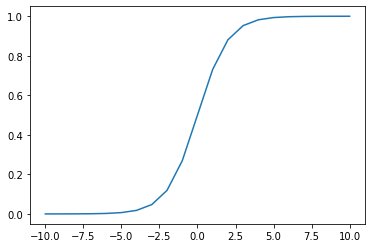

In [5]:
# x = np.array([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])
x = np.arange(-10, 11)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)

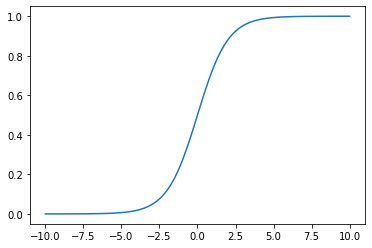

In [6]:
x = np.linspace(-10, 10, 100)
z = 1 / (1 + np.exp(-x))
plt.plot(x, z)

In [7]:
df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
                   'b': [10, 15, 40, 100, 200, 400]})
df

,a,b
0,1,10
1,2,15
2,3,40
3,4,100
4,5,200
5,6,400


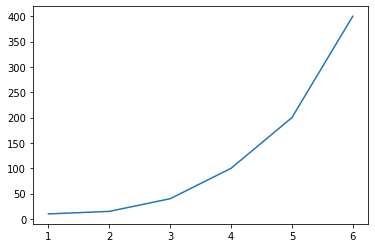

In [8]:
plt.plot(df['a'], df['b'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Second argument 'b' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """Entry point for launching an IPython kernel.


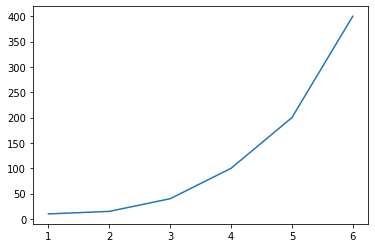

In [9]:
plt.plot('a', 'b', data=df)

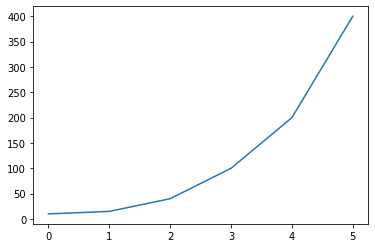

In [10]:
plt.plot(df['b'])  # indexが横軸になる

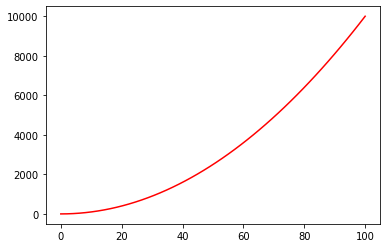

In [11]:
x = np.linspace(0, 100)
y = x ** 2
plt.plot(x, y,
         color='red')

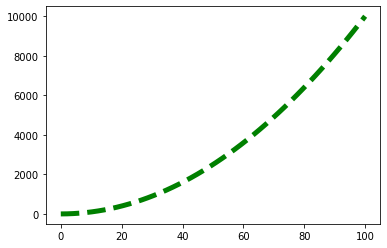

In [12]:
x = np.linspace(0, 100)
y = x ** 2
plt.plot(x, y,
         'g--',
         linewidth=5)

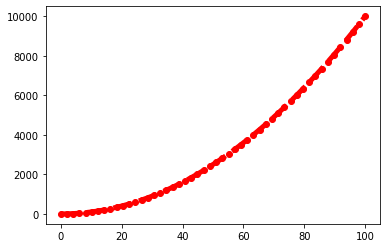

In [13]:
x = np.linspace(0, 100)
y = x ** 2
plt.plot(x, y,
        color='red',
        lw=5,
        ls='--',
        marker='o')

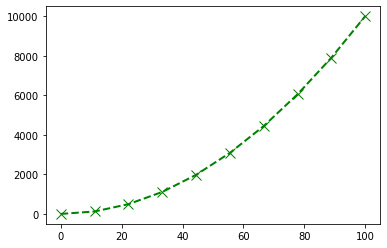

In [14]:
x = np.linspace(0, 100, 10)
y = x ** 2
plt.plot(x, y,
        color='green',
        lw=2,
        ls='--',
        marker='x',
        markersize=10)

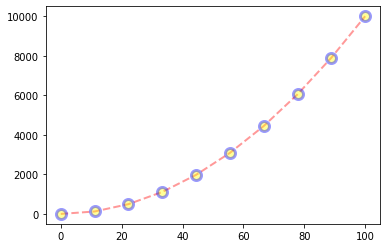

In [15]:
x = np.linspace(0, 100, 10)
y = x ** 2
plt.plot(x, y,
        color='red',
        lw=2,
        ls='--',
        marker='o',
        markersize=10,
        markerfacecolor='yellow',
        markeredgecolor='blue',
        markeredgewidth=3,
        alpha=0.4)

Text(0.5, 1.0, 'not sigmoid')

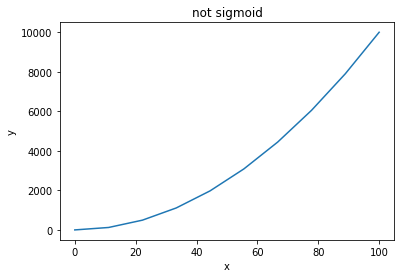

In [16]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('not sigmoid')

([<matplotlib.axis.YTick at 0x7f5e52e3c2d0>,
 <a list of 3 Text yticklabel objects>)

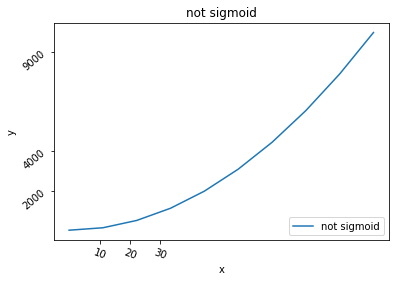

In [17]:
plt.plot(x, y, label='not sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.title('not sigmoid')
plt.legend(loc=4)
plt.xticks([10, 20, 30], rotation=-20)
plt.yticks([2000, 4000, 9000], rotation=40)

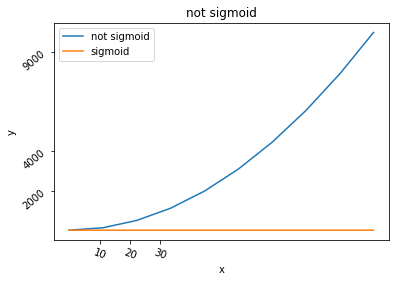

In [18]:
plt.plot(x, y, label='not sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([10, 20, 30], rotation=-20)
plt.yticks([2000, 4000, 9000], rotation=40)

z = 1 / (1 + np.exp(x))
plt.plot(x, z, label='sigmoid')
plt.title('not sigmoid')
plt.legend(loc='best')

In [19]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [20]:
df['release_date'][0]

'2009-12-10'

In [21]:
df['release_date'][df['release_date'].isna()]

4553    NaN
Name: release_date, dtype: object

In [22]:
df = df.dropna(subset=['release_date'])

In [23]:
# フォーマットが異なる入力があるかどうかを確認
import re
# string = '2012-03-31'
# if re.search('^(19|20)..-..-..', string):
#     print(type(string))
# else:
#     print(False)
    
count = 0
for date_string in df['release_date']:
    if not re.search('^(19|20)..-..-..', date_string):
        count += 1
        print(f'{date_string}, type: {type(date_string)}')
        if count == 5:
            break
    else:
        pass

print(count)

0


In [24]:
df = df[~((df['revenue'] == 0) | df['revenue'].isna())]
len(df)

3376

In [25]:
df['release_date'] = df['release_date'].apply(lambda x: x.split('-')[0])

In [26]:
# df.drop(['releasedate'], axis=1, inplace=True)

In [27]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [28]:
df_transition = pd.DataFrame(df.groupby(by='release_date')['title'].count())
df_transition

,title
release_date,
1916,1
1925,1
1927,1
1929,1
1930,1
...,...
2012,150
2013,163
2014,143


In [29]:
date_list = []
movie_count_list = []

for idx, row in df_transition.iterrows():
    date_list.append(int(idx))
    movie_count_list.append(int(row[0]))

Text(0.5, 1.0, 'Number of films per year')

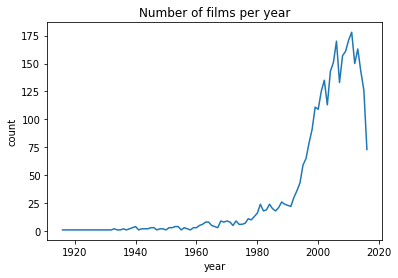

In [30]:
plt.plot(date_list, movie_count_list)
plt.xlabel('year')
plt.ylabel('count')
plt.title('Number of films per year')

Text(0, 0.5, 'revenue')

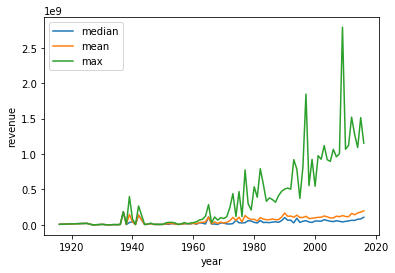

In [31]:
# revenueの年推移（中央値、平均値、最大値）
plt.plot(date_list, df.groupby(by='release_date')['revenue'].median(), label='median')
plt.plot(date_list, df.groupby(by='release_date')['revenue'].mean(), label='mean')
plt.plot(date_list, df.groupby(by='release_date')['revenue'].max(), label='max')
plt.legend(loc='best')
plt.xlabel('year')
plt.ylabel('revenue')
#plt.xticks([1920, 1940, 1960, 1980, 2000, 2020])

In [32]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [33]:
df[df['revenue'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


In [34]:
df[df['revenue'] == 0]['revenue'].count()

1427

In [35]:
df = df[df['revenue'] != 0]
len(df)

3376

In [36]:
df[df['release_date'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


In [37]:
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))
df['year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4775    2002
4788    1972
4792    1997
4796    2004
4798    1992
Name: year, Length: 3376, dtype: int64

In [38]:
type(df['year'][0])

numpy.int64

In [39]:
df_films = df.groupby(by='year')['id'].count()
df_films

year
1916      1
1925      1
1927      1
1929      1
1930      1
       ... 
2012    150
2013    163
2014    143
2015    126
2016     73
Name: id, Length: 89, dtype: int64

In [40]:
df_median = df.groupby(by='year')['revenue'].median()
df_median

year
1916      8394751.0
1925     22000000.0
1927       650422.0
1929      4358000.0
1930      8000000.0
           ...     
2012     64793040.0
2013     63464861.0
2014     80383290.0
2015     84769058.0
2016    108286421.0
Name: revenue, Length: 89, dtype: float64

In [41]:
df_mean = df.groupby('year')['revenue'].mean()
df_mean

year
1916    8.394751e+06
1925    2.200000e+07
1927    6.504220e+05
1929    4.358000e+06
1930    8.000000e+06
            ...     
2012    1.609447e+08
2013    1.436288e+08
2014    1.686748e+08
2015    1.807542e+08
2016    1.980980e+08
Name: revenue, Length: 89, dtype: float64

In [42]:
df_max = df.groupby('year')['revenue'].max()
df_max

year
1916       8394751
1925      22000000
1927        650422
1929       4358000
1930       8000000
           ...    
2012    1519557910
2013    1274219009
2014    1091405097
2015    1513528810
2016    1153304495
Name: revenue, Length: 89, dtype: int64

Text(0.5, 1.0, 'number of films per year')

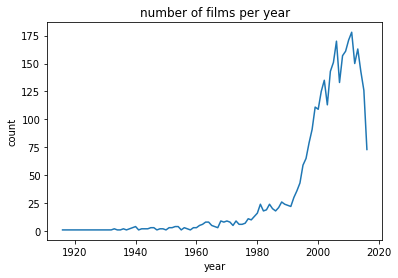

In [43]:
plt.plot(df_films)
plt.xlabel('year')
plt.ylabel('count')
plt.title('number of films per year')

Text(0, 0.5, 'revenue')

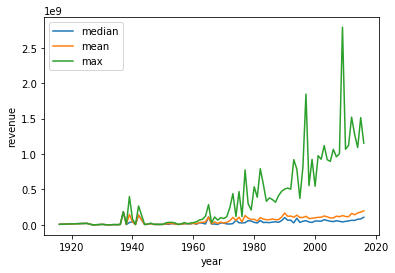

In [44]:
plt.plot(df_median, label='median')
plt.plot(df_mean, label='mean')
plt.plot(df_max, label='max')
plt.legend(loc='best')
plt.xlabel('year')
plt.ylabel('revenue')

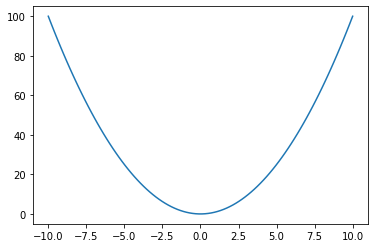

In [45]:
x = np.linspace(-10, 10, 100)
plt.plot(x, x**2)

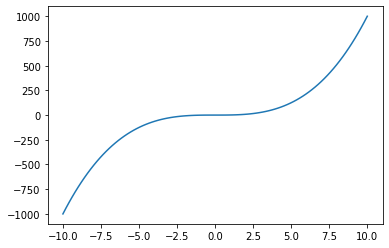

In [46]:
plt.plot(x, x**3)

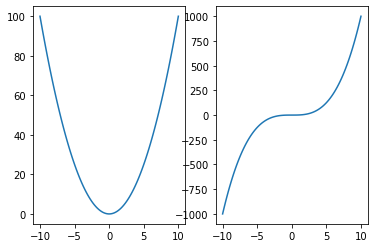

In [47]:
x = np.linspace(-10, 10, 100)
plt.subplot(1, 2, 1)
plt.plot(x, x**2)

plt.subplot(1, 2, 2)
plt.plot(x, x**3)

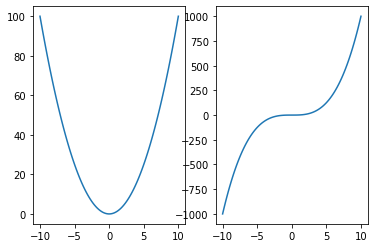

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, x**2)
ax2.plot(x, x**3)

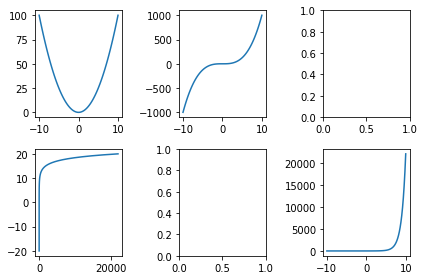

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=3)

# axesは numpy array で返ってくる
axes[0][0].plot(x, x**2)
axes[0, 1].plot(x, x**3)
axes[1, 2].plot(x, np.exp(x))
axes[1][0].plot(np.exp(x), x*2)
fig.tight_layout()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


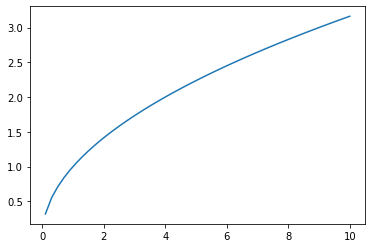

In [50]:
# 1つのグラフに対しても使用できる
fig, axes = plt.subplots()
axes.plot(x, np.sqrt(x))

(-11.0, 11.0, -1100.0, 1100.0)

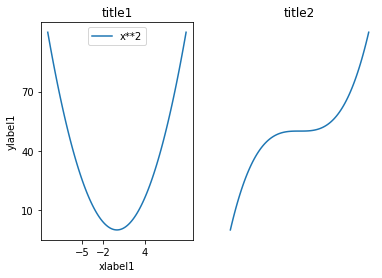

In [51]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, x**2, label='x**2')
axes[1].plot(x, x**3)
axes[0].set_xlabel('xlabel1')
axes[0].set_ylabel('ylabel1')
axes[0].set_title('title1')
axes[1].set_title('title2')
axes[0].set_xticks([-5, -2, 4])
axes[0].set_yticks([10, 40, 70])
axes[0].legend()

# 軸を消す
axes[1].axis('off')
#fig.tight_layout()

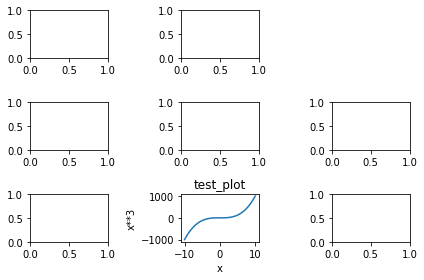

In [52]:
fig, axes = plt.subplots(3, 3)
axes[2, 1].plot(x, x**3)
axes[2, 1].set_title('test_plot')
axes[2, 1].set_xlabel('x')
axes[2, 1].set_ylabel('x**3')
axes[0, 2].axis('off')
fig.tight_layout()

In [53]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


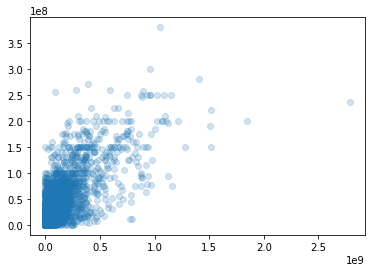

In [54]:
plt.scatter(df['revenue'], df['budget'], alpha=0.2)

In [55]:
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
df.groupby('original_language').mean()[['budget', 'revenue', 'vote_count']]

,budget,revenue,vote_count
original_language,,,
af,3.000000e+06,9.879971e+06,94.000000
cn,1.984339e+07,6.296073e+07,327.000000
da,1.510000e+07,5.232305e+07,703.250000
de,2.019886e+07,4.159554e+07,609.555556
en,4.166120e+07,1.245451e+08,998.277885
es,1.027506e+07,3.362737e+07,521.866667
fa,1.800000e+05,9.000000e+05,112.000000
fr,1.786534e+07,3.292465e+07,371.320000
he,2.000000e+06,1.112585e+07,291.000000


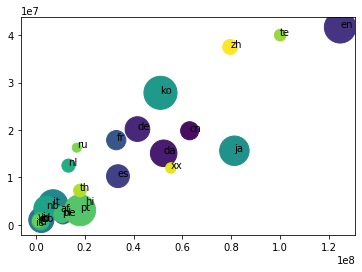

In [56]:
lang_group_df = df.groupby('original_language').mean()[['budget', 'revenue', 'vote_count']]
c = np.arange(len(lang_group_df))
plt.scatter('revenue', 'budget', s='vote_count', c=c, data=lang_group_df)

for idx, row in lang_group_df.iterrows():
    plt.annotate(idx, (row['revenue'], row['budget']))

In [57]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


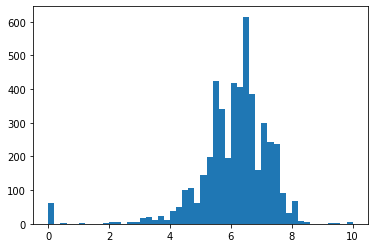

In [58]:
plt.hist(df['vote_average'], bins=50)
plt.show()

In [59]:
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
len(df)

3229

In [60]:
df['profit'] = df['revenue'] - df['budget']
df['profit']

0       2550965087
1        661000000
2        635674609
3        834939099
4         24139100
           ...    
4773       3124130
4788       5988000
4792         79000
4796        417760
4798       1820920
Name: profit, Length: 3229, dtype: int64

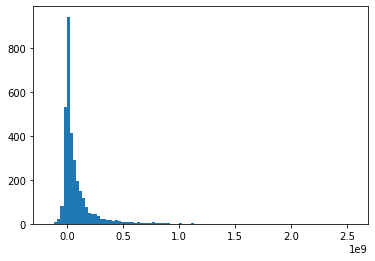

In [61]:
# plt.hist(df['profit'], bins=100)
# plt.show()
fig, axes = plt.subplots(1, 1)
axes.hist(df['profit'], bins=100)
plt.show()

In [62]:
df['profit2'] = df.apply(lambda x: x['revenue'] - x['budget'], axis=1)
df['profit2']

0       2550965087
1        661000000
2        635674609
3        834939099
4         24139100
           ...    
4773       3124130
4788       5988000
4792         79000
4796        417760
4798       1820920
Name: profit2, Length: 3229, dtype: int64

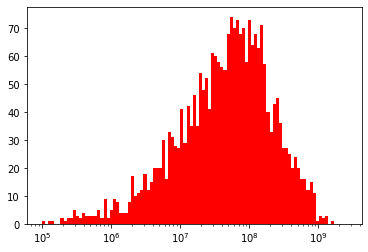

In [67]:
fig, axes = plt.subplots()
logbins = np.logspace(5, np.log10(df['profit2'].max()), 100)
axes.hist(df['profit2'], bins=logbins, color='red')
axes.set_xscale('log')
plt.show()

In [64]:
df['profit'].max()

2550965087

In [69]:
df = pd.DataFrame({'categorical': ['A', 'B', 'C'],
                   'val': [10, 20, 30]})
df

,categorical,val
0,A,10
1,B,20
2,C,30


<BarContainer object of 3 artists>

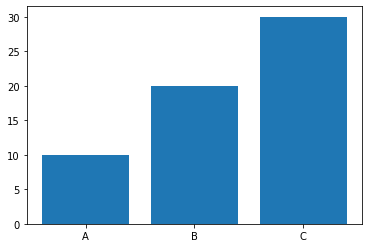

In [70]:
plt.bar('categorical', 'val', data=df)

<BarContainer object of 3 artists>

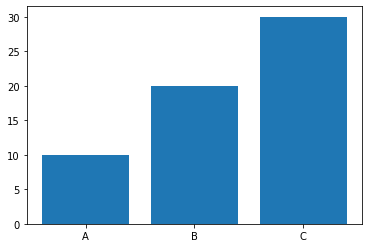

In [71]:
plt.bar(df['categorical'], df['val'])

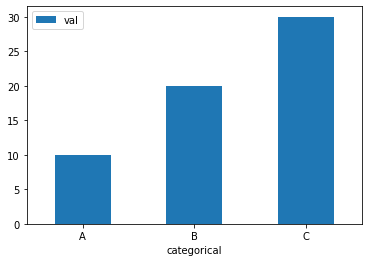

In [73]:
df.plot('categorical', 'val', kind='bar', rot=0)

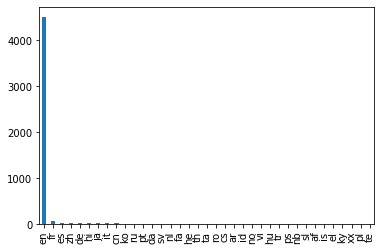

In [79]:
df = pd.read_csv('tmdb_5000_movies.csv')
df['original_language'].value_counts().plot(kind='bar')

In [80]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5e4af3b390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5e4af3bdd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5e4af35790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5e4af357d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5e4af40d50>],
 'means': []}

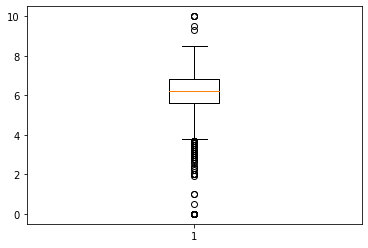

In [81]:
plt.boxplot(df['vote_average'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5e4c083790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5e4c083490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5e4c0a88d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5e4c08c790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5e4c08c210>],
 'means': []}

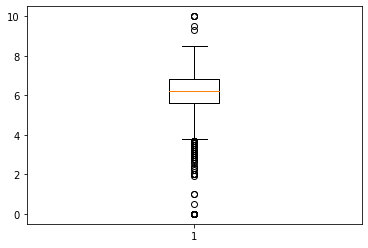

In [82]:
plt.boxplot('vote_average', data=df)

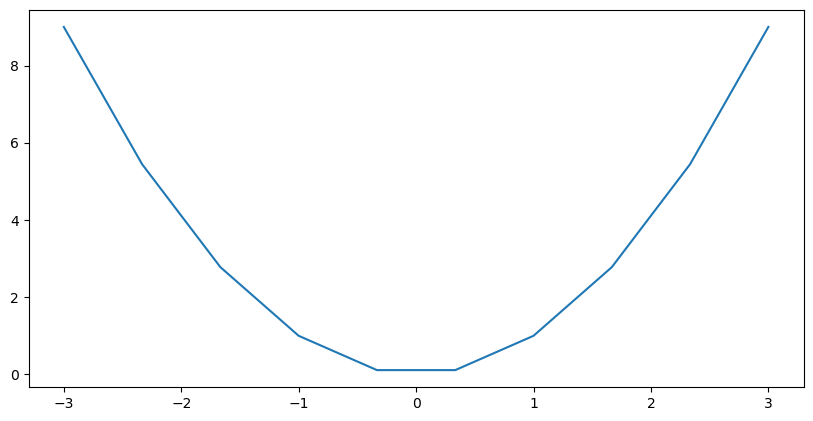

In [86]:
x = np.linspace(-3, 3, 10)
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(x, x**2)

<BarContainer object of 10 artists>

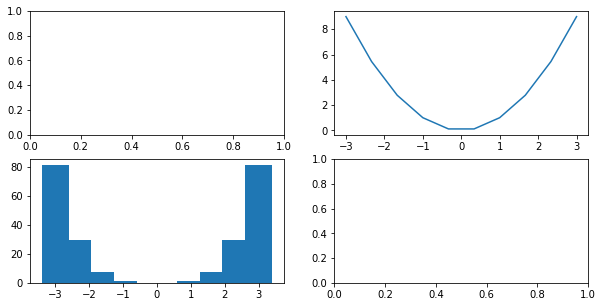

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0, 1].plot(x, x**2)
axes[1, 0].bar(x, x**4)

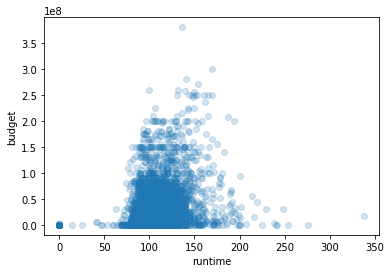

In [96]:
df = pd.read_csv('tmdb_5000_movies.csv')
plt.scatter('runtime', 'budget', data=df, alpha=0.2)
plt.xlabel('runtime')
plt.ylabel('budget')
plt.savefig('runtime_budget_scatter.png')

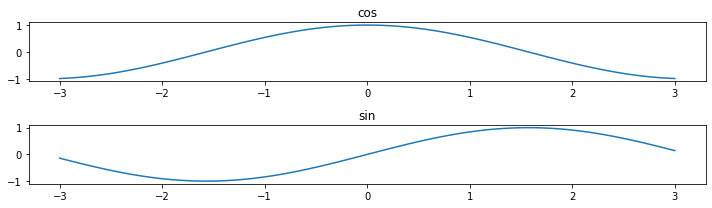

In [105]:
fig, axes = plt.subplots(2, 1, figsize=(10, 3))
x = np.linspace(-3, 3, 100)
axes[0].set_title('cos')
axes[1].set_title('sin')
axes[0].plot(x, np.cos(x))
axes[1].plot(x, np.sin(x))
fig.tight_layout()
fig.savefig('cos_sin.png')

In [106]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages('pdf_files.pdf')

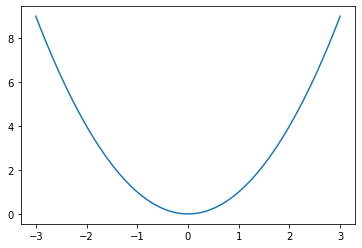

In [107]:
fig, axes = plt.subplots()
axes.plot(x, x**2)

In [109]:
pdf.savefig(fig)
pdf.close()

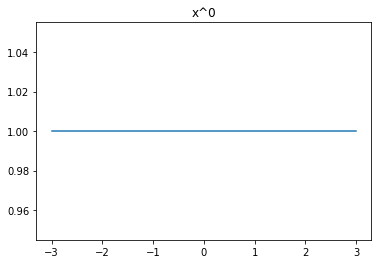

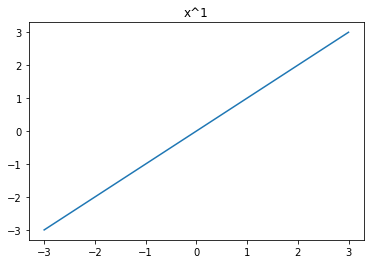

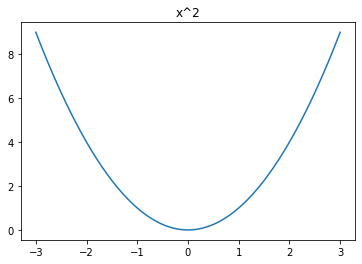

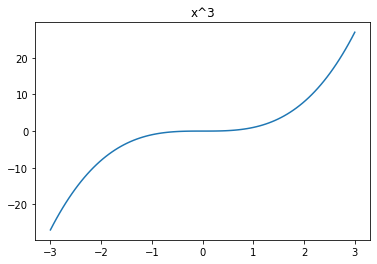

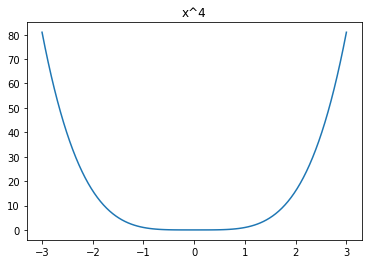

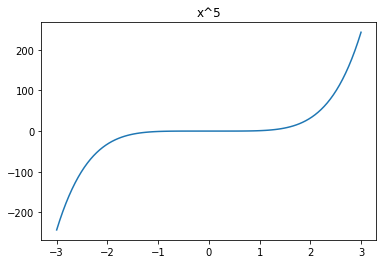

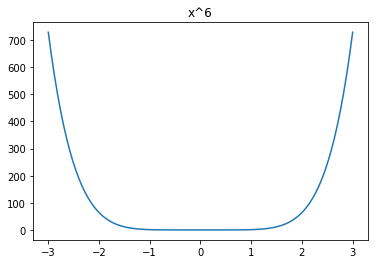

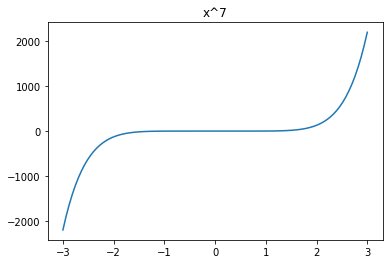

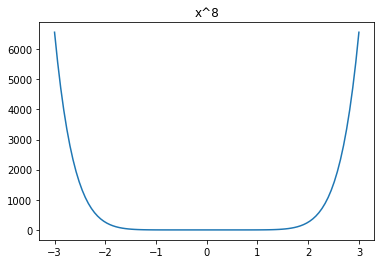

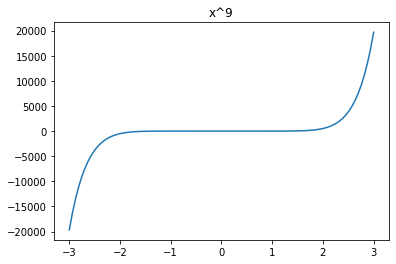

In [112]:
pdf = PdfPages('savemultifig_sample.pdf')
for i in range(10):
    fig, axes = plt.subplots()
    axes.plot(x, x**i)
    axes.set_title(f'x^{i}')
    pdf.savefig(fig)
pdf.close()